In [1]:
import os
import glob

import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

In [2]:
def smooth(x, axis=0, wid=5):
    # this is way faster than convolve
    if wid < 2:
        return x
    cumsum_vec = np.cumsum(np.insert(x, 0, 0, axis=axis), axis=axis)
    ma_vec = (cumsum_vec[wid:] - cumsum_vec[:-wid]) / wid
    y = x.copy()
    start_ind = int(np.floor((wid-1)/2))
    end_ind = wid-1-start_ind
    y[start_ind:-end_ind] = ma_vec
    return y

In [3]:
test_path = '/oak/stanford/groups/trc/data/krave/bruker_data/imports/test/test_channel_1.nii'
os.path.exists(test_path)

False

In [4]:
test_img = np.asarray(nib.load(test_path).get_data(), dtype='float32')

/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.


In [5]:
test_img.shape

(256, 199, 6, 17916)

In [9]:
test2 = test_img[:, :, :, 0:1000]
test2.shape

(256, 199, 6, 1000)

In [10]:
test2 = np.moveaxis(test2, [0,1,2,3], [1,2,3,0])
test2.shape

(1000, 256, 199, 6)

In [11]:
smoothed_test2 = smooth(test2, wid=4)
smoothed_test2.shape

(1000, 256, 199, 6)

In [12]:
test2 = np.moveaxis(test2, [0,1,2,3], [3,0,1,2])
test2.shape

(256, 199, 6, 1000)

In [13]:
smoothed_test2 = np.moveaxis(smoothed_test2, [0,1,2,3], [3,0,1,2])
smoothed_test2.shape

(256, 199, 6, 1000)

In [15]:
save_channel1 = '/oak/stanford/groups/trc/data/krave/bruker_data/imports/test/chunk_channel_1.nii'
save_channel2 = '/oak/stanford/groups/trc/data/krave/bruker_data/imports/test/chunk_channel_2.nii'

nib.Nifti1Image(smoothed_test2, np.eye(4)).to_filename(save_channel1)
nib.Nifti1Image(test2, np.eye(4)).to_filename(save_channel2)

In [5]:
save_channel1 = '/oak/stanford/groups/trc/data/krave/bruker_data/imports/test/chunk_channel_1.nii'
save_channel2 = '/oak/stanford/groups/trc/data/krave/bruker_data/imports/test/chunk_channel_2.nii'

img_ch1 = np.asarray(nib.load(save_channel1).get_data(), dtype='float32')
img_ch2 = np.asarray(nib.load(save_channel2).get_data(), dtype='float32')

/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  after removing the cwd from sys.path.
/share/software/user/open/py-jupyter/1.0.0_py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """


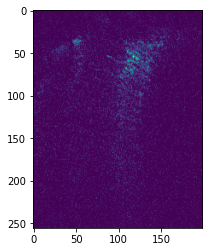

In [8]:
plt.imshow(img_ch1[:,:,2,3])
plt.show()

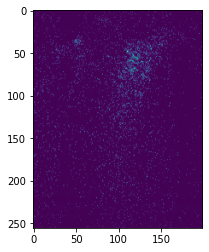

In [9]:
plt.imshow(img_ch2[:,:,2,3])
plt.show()